In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import pandas_ta as ta

In [171]:
import warnings
warnings.filterwarnings("ignore")

# Data import

In [172]:
data = yf.download(tickers = 'EURUSD=x', period='1mo', interval='5m')
data.index.rename("Date", inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-29 13:55:00,1.071582,1.071811,1.071582,1.071811,1.071811,0
2023-05-29 14:00:00,1.071697,1.072156,1.071697,1.071811,1.071811,0
2023-05-29 14:05:00,1.071811,1.071811,1.071582,1.071697,1.071697,0
2023-05-29 14:10:00,1.071697,1.071697,1.071697,1.071697,1.071697,0
2023-05-29 14:15:00,1.071926,1.072041,1.071237,1.071237,1.071237,0
...,...,...,...,...,...,...
2023-06-29 13:30:00,1.092657,1.092657,1.090869,1.090869,1.090869,0
2023-06-29 13:35:00,1.090750,1.091107,1.090513,1.091107,1.091107,0
2023-06-29 13:40:00,1.091227,1.091227,1.090275,1.090750,1.090750,0


In [173]:
len(data)

6544

# Additional Features

In [174]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
### Column choice 

In [175]:
data_set = data.iloc[:, 0:len(data.columns)]#.values

In [176]:
pd.set_option('display.max_columns', None)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

In [177]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [178]:
data_set

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1.072041,1.072271,1.072041,1.072271,59.267520,1.071866,1.071532,1.071470,0.000115,1,1.072386
1,1.072271,1.072731,1.072271,1.072386,60.902456,1.071915,1.071549,1.071482,0.000230,1,1.072616
2,1.072386,1.072846,1.072271,1.072616,63.998936,1.071982,1.071570,1.071497,-0.000345,0,1.072386
3,1.072731,1.072731,1.072386,1.072386,58.993029,1.072020,1.071587,1.071509,0.000000,0,1.072501
4,1.072501,1.072616,1.072386,1.072501,60.642230,1.072066,1.071605,1.071522,0.000115,1,1.072501
...,...,...,...,...,...,...,...,...,...,...,...
6389,1.093853,1.093972,1.093853,1.093853,62.190950,1.093606,1.092091,1.091859,-0.001788,0,1.090869
6390,1.092657,1.092657,1.090869,1.090869,25.538643,1.093346,1.092067,1.091846,0.000357,1,1.091107
6391,1.090750,1.091107,1.090513,1.091107,29.110865,1.093133,1.092048,1.091836,-0.000476,0,1.090750
6392,1.091227,1.091227,1.090275,1.090750,27.027367,1.092906,1.092022,1.091822,-0.000119,0,1.090394


In [ ]:
# Preparation for training

In [ ]:
### MinMax Scaling

In [179]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.21665168 0.22044113 0.22188793 ... 0.59383951 1.         0.22587816]
 [0.22280054 0.23278898 0.22809855 ... 0.62973848 1.         0.2320334 ]
 [0.22587816 0.23587914 0.22809855 ... 0.45024367 0.         0.22587816]
 ...
 [0.71718747 0.72590969 0.7210214  ... 0.40935977 0.         0.71718747]
 [0.72992531 0.72910542 0.71459496 ... 0.52085116 0.         0.70764206]
 [0.71082174 0.71952144 0.71780979 ... 0.26163461 0.         0.66952104]]


In [ ]:
### BackCandles parameter

In [180]:
backcandles = 30

In [181]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
print(data_set_scaled.shape[0])
for j in range(data_set_scaled.shape[1] - 3):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(X)
# print(X.shape)
# print(y)
# print(y.shape)

6394


In [182]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# Train Test Split

In [183]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
# print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print("Train length: {}\nTest length: {}\nRatio: {}".format(X_train.shape[0], X_test.shape[0], X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])))
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(y_train)

Train length: 5091
Test length: 1273
Ratio: 0.7999685732243872


In [ ]:
# Model

In [190]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, data_set.shape[1]-3), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1);

Epoch 1/30


2023-06-29 14:58:51.675762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 14:58:51.676690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 14:58:51.677301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 [==============================] - 3s 8ms/step - loss: 0.0130 - val_loss: 0.0048
Epoch 2/30
  1/306 [..............................] - ETA: 3s - loss: 0.0036

2023-06-29 14:58:54.929346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 14:58:54.930183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 14:58:54.930818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 [==============================] - 2s 7ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 3/30
306/306 [==============================] - 2s 7ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 4/30
306/306 [==============================] - 2s 7ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 5/30
306/306 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 6/30
306/306 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 7/30
306/306 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 8/30
306/306 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 9/30
306/306 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 10/30
306/306 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 11/30
306/306 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 0.0048
Epoch 12/

In [ ]:
# Saving model

In [194]:
from keras.models import save_model

model.save('model')

2023-06-29 15:00:54.791100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 15:00:54.791826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 15:00:54.792463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [ ]:
# Loading model

In [195]:
from keras.models import load_model
model = load_model("model")

2023-06-29 15:01:15.939710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-06-29 15:01:15.939786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-06-29 15:01:15.939831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
# Evaluation

In [196]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
# for i in range(10):
#     print(y_pred[i], y_test[i])

26/40 [==================>...........] - ETA: 0s

2023-06-29 15:01:20.124374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 15:01:20.125356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 15:01:20.125949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

40/40 [==============================] - 0s 4ms/step


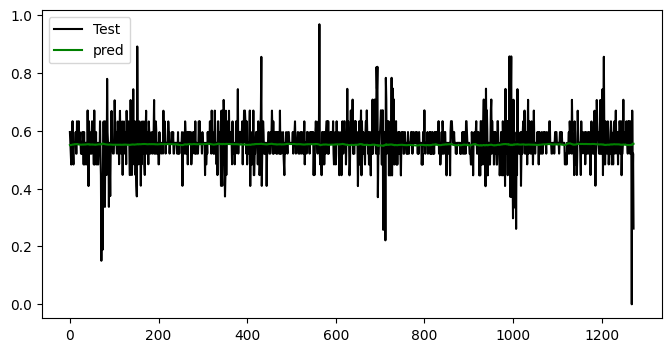

In [205]:
plt.figure(figsize=(8,4))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# Dataframe with predictions

In [206]:
df = pd.DataFrame({"prediction": y_pred.reshape(-1), "real": y_test.reshape(-1)})
df

,prediction,real
0,0.550191,0.595402
1,0.550620,0.557941
2,0.550265,0.520479
3,0.550764,0.483055
4,0.551311,0.557941
...,...,...
1268,0.551210,0.000000
1269,0.551224,0.669358
1270,0.555081,0.409360
1271,0.554057,0.520851


In [207]:
df['prediction_diff'] = df.prediction.diff(periods=2)
df['real_diff'] = df.real.diff(periods=2)
def is_trade(row):
    if row >= 0:
        return 1
    if row <= 0:
        return -1
df.dropna(inplace=True)
df['prediction_tendency'] = df['prediction_diff'].apply(is_trade).astype('int')
df['real_tendency'] = df['real_diff'].apply(is_trade).astype('int')

def compatible(row):
    if row['prediction_tendency'] == row['real_tendency']:
        return 1
    return -1

df['compatibility'] = df.apply(compatible, axis=1).astype('int')
df.dropna(inplace=True)
df.reset_index(drop=True)
df

,prediction,real,prediction_diff,real_diff,prediction_tendency,real_tendency,compatibility
2,0.550265,0.520479,0.000074,-0.074923,1,-1,-1
3,0.550764,0.483055,0.000143,-0.074886,1,-1,-1
4,0.551311,0.557941,0.001046,0.037461,1,1,1
5,0.551850,0.557941,0.001086,0.074886,1,1,1
6,0.552334,0.632826,0.001023,0.074886,1,1,1
...,...,...,...,...,...,...,...
1268,0.551210,0.000000,0.000516,-0.557941,1,-1,-1
1269,0.551224,0.669358,0.000537,0.111417,1,1,1
1270,0.555081,0.409360,0.003871,0.409360,1,1,1
1271,0.554057,0.520851,0.002833,-0.148506,1,-1,-1


In [208]:
print("Prediction compatibility: " + str(len(df[df.prediction_tendency == df.real_tendency])/len(df)))

Prediction compatibility: 0.6247049567269867


<AxesSubplot: >

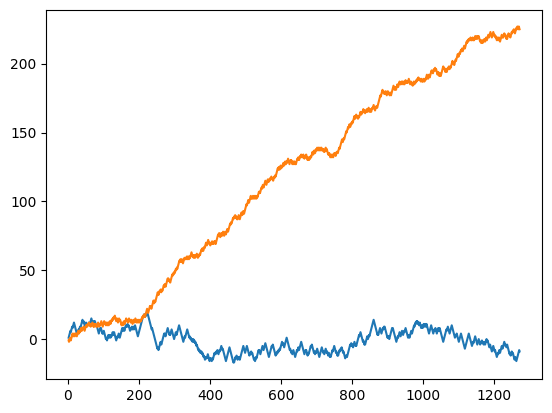

In [209]:
ax = df.prediction_tendency.cumsum().plot()
df.real_tendency.cumsum().plot(ax=ax)

<AxesSubplot: >

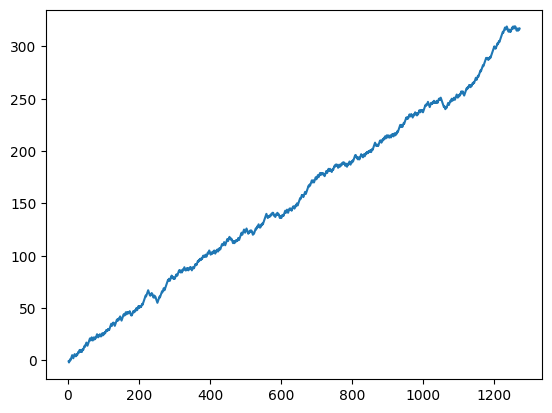

In [210]:
df.compatibility.cumsum().plot()